# Healthcare Medical Costs Analysis

Data Description:
The data at hand contains medical costs of people characterized by certain attributes.
Context:
Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.
Attribute Information:
age​: age of primary beneficiary
sex​: insurance contractor gender, female, male
bmi​: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
children​: Number of children covered by health insurance / Number of dependents
smoker​: Smoking
region​: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
charges​: Individual medical costs billed by health insurance.
Learning Outcomes:
Exploratory Data Analysis Practicing statistics using Python Hypothesis testing

Objective:
  We want to see if we can dive deep into this data to find some valuable insights.
Steps and tasks:
Import the necessary libraries
Read the data as a data frame
Perform basic EDA which should include the following and print out your insights at every step.
Shape of the data
Data type of each attribute
Checking the presence of missing values
5 point summary of numerical attributes
Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
Distribution of categorical columns (include children)
Pair plot that includes all the columns of the dataframe
Answer the following questions with statistical evidence
Do charges of people who smoke differ significantly from the people who don't?
Does bmi of males differ significantly from that of females?
Is the proportion of smokers significantly different in different genders?
Is the distribution of bmi across women with no children, one child and two children, the same

In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# 2. Read the data as a data frame

In [24]:
df = pd.read_csv('download.csv')
print(df)
print(df.info()) # get info about the dataframe
print("Any blank values present\n", df.isnull().sum()) #check if any blank values is present
missing_values=df.columns[df.isnull().any()]
print("printing missing values column names\n", missing_values)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
6      46  female  33.440         1     no  southeast   8240.58960
7      37  female  27.740         3     no  northwest   7281.50560
8      37    male  29.830         2     no  northeast   6406.41070
9      60  female  25.840         0     no  northwest  28923.13692
10     25    male  26.220         0     no  northeast   2721.32080
11     62  female  26.290         0    yes  southeast  27808.72510
12     23    male  34.400         0     no  southwest   1826.84300
13     56  female  39.820         0     no  southeast  11090.7

In [25]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338,NaN,NaN,NaN,39.207,14.05,18,27,39,51,64
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338,NaN,NaN,NaN,30.6634,6.09819,15.96,26.2963,30.4,34.6938,53.13
children,1338,NaN,NaN,NaN,1.09492,1.20549,0,0,1,2,5
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338,NaN,NaN,NaN,13270.4,12110,1121.87,4740.29,9382.03,16639.9,63770.4


In [26]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [27]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

# 5 point summary of numerical attributes
### 1. BMI is normally distributed with mean and median same
### 2. As age increases the charges increases
### 3. Most people has BMI of around 30
### 4. Over 40% of people have no kids
### 5. The charges is heavily right skewed and lot of outliers present

# Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64


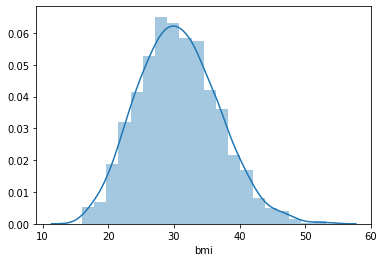

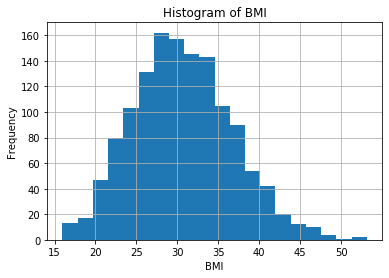

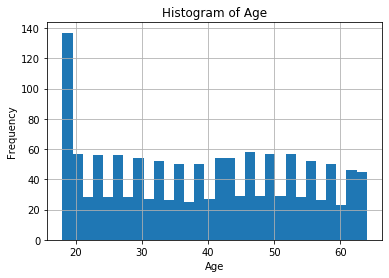

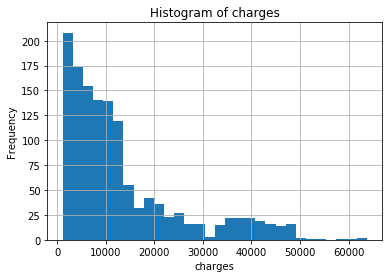

In [28]:
sns.distplot(df['bmi'], bins=20, kde=True, hist=True)

df.hist('bmi', bins=20)
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

df.hist('age', bins=30)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

df.hist('charges', bins=30)
plt.title('Histogram of charges')
plt.xlabel('charges')
plt.ylabel('Frequency')

print(df.skew(axis = 0, skipna = True))

# ‘bmi’, ‘age’ and ‘charges columns

age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64
26.29625
34.69375
8.3975
13.7
47.290000000000006
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


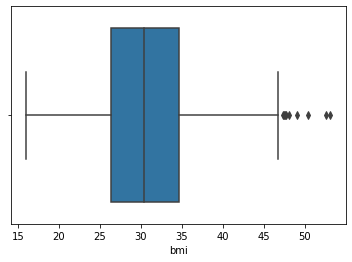

In [29]:
## bmi outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

sns.boxplot(x=df['bmi'])

Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)
Low_outliers = Q1 - 1.5 * IQR
high_outliers = Q3 + 1.5 * IQR
print(Low_outliers)
print(high_outliers)

print(df[(df['bmi'] < Low_outliers) |  (df['bmi'] > high_outliers)])

27.0
51.0
24.0
-9.0
87.0


,age,sex,bmi,children,smoker,region,charges


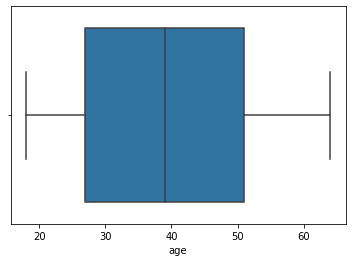

In [30]:
## age outliers
sns.boxplot(x=df['age'])

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)
Low_outliers = Q1 - 1.5 * IQR
high_outliers = Q3 + 1.5 * IQR
print(Low_outliers)
print(high_outliers)

df[(df['age'] < Low_outliers) |  (df['age'] > high_outliers)]

4740.28715
16639.912515
11899.625365
-13109.1508975
34489.350562499996


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
34,28,male,36.400,1,yes,southwest,51194.55914
38,35,male,36.670,1,yes,northeast,39774.27630
39,60,male,39.900,0,yes,southwest,48173.36100
49,36,male,35.200,1,yes,southeast,38709.17600
53,36,male,34.430,0,yes,southeast,37742.57570


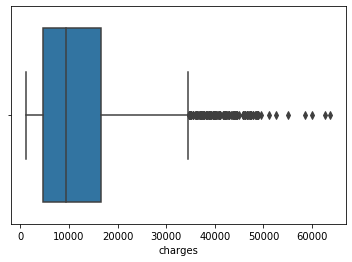

In [31]:
## Charges outliers
sns.boxplot(x=df['charges'])

Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)
Low_outliers = Q1 - 1.5 * IQR
high_outliers = Q3 + 1.5 * IQR
print(Low_outliers)
print(high_outliers)

df[(df['charges'] < Low_outliers) |  (df['charges'] > high_outliers)]

# Distribution of categorical columns (includechildren)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


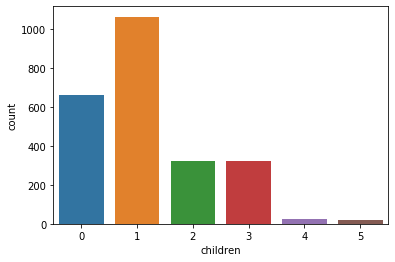

In [32]:
df.info()

sns.countplot(x='sex', data=df)
sns.countplot(x='smoker', data=df)
sns.countplot(x='region', data=df)
sns.countplot(x='children', data=df)

# Pair plot that includes all the columns of the dataframe

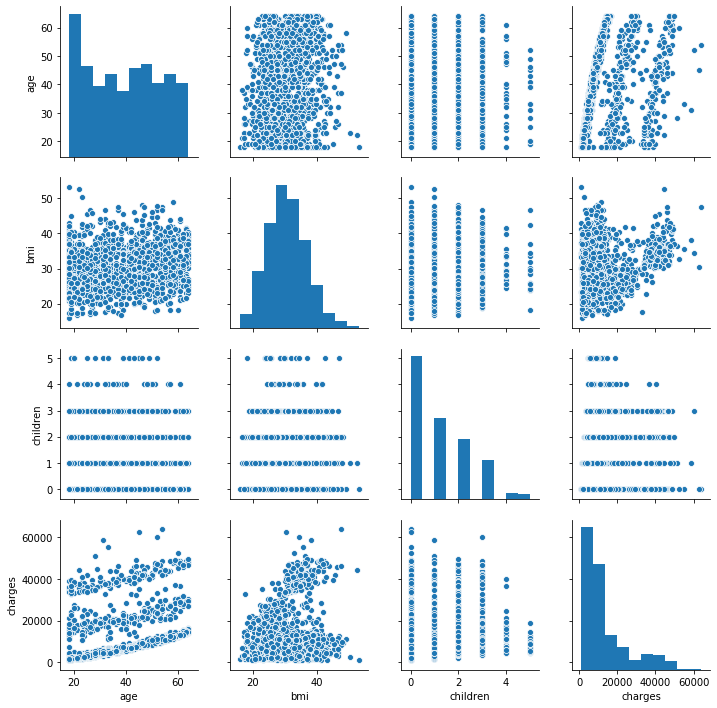

In [33]:
sns.pairplot(df)

# Do charges of people who smoke differ significantly from the people who don't?

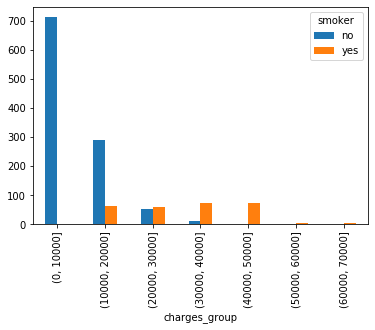

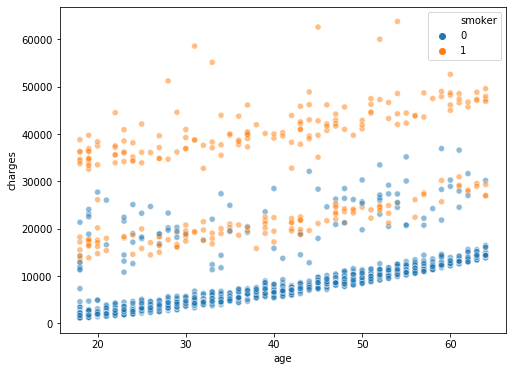

In [43]:
df_1 = df.copy(deep=True)

#if smoker replace with 1
#if non-smoker replace with 0
df_1['smoker'].replace(to_replace =["yes"] ,value ="1",inplace=True)
df_1['smoker'].replace(to_replace =["no"] ,value ="0",inplace=True)

df_1['smoker'] = df_1['smoker'].apply(pd.to_numeric) 
df_1['charges'] = df_1['charges'].apply(pd.to_numeric)

df_1['charges_group'] = pd.cut(x=df_1['charges'],bins=[0,10000,20000,30000,40000,50000,60000,70000])
pd.crosstab(df_1['charges_group'],df['smoker']).plot(kind='bar')

plt.figure(figsize=(8,6))
sns.scatterplot(df_1.age, df_1.charges,hue=df_1.smoker,alpha=0.5)
               
plt.show()

In [35]:
#H0= charges for smoker and non smoker are same
#H1= charges for smoker and non smoker are different

smoker=np.array(df[df.smoker=='yes'].charges)
non_smoker=np.array(df[df.smoker=='no'].charges)

t_statistic, p_value  =  stats.ttest_ind(smoker,non_smoker)

print(t_statistic)
print(p_value)
if p_value > 0.05 :
    print('charges for smoker and non smoker are same')
else :
    print('charges for smoker and non smoker are different',p_value)

46.664921172723716
8.271435842177219e-283
charges for smoker and non smoker are different 8.271435842177219e-283


# Does bmi of males differ significantly from that of females?

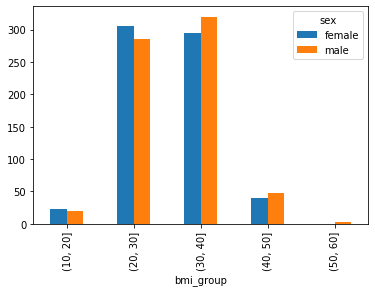

In [36]:
df.dtypes
df['bmi_group'] = pd.cut(x=df['bmi'],bins=[0,10,20,30,40,50,60])
pd.crosstab(df['bmi_group'],df['sex']).plot(kind='bar')

In [37]:
#H0= bmi of males and females are same
#H1= bmi of males and females are different

bmm=df[df.sex=='male']
bm1=bmm['bmi']
bmf=df[df.sex=='female']
bm2=bmf['bmi']
t_statistic,p_value=stats.ttest_ind(bm1,bm2)

print(t_statistic)
print(p_value)

##bmi of males and females are same since the p_value is greater than 0.05

1.696752635752224
0.08997637178984932


# Is the proportion of smokers significantly different in different genders?

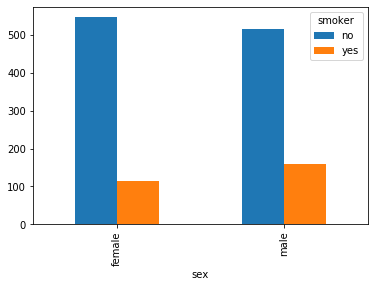

In [38]:
pd.crosstab(df['sex'],df['smoker']).plot(kind='bar')

In [39]:
# Chi_square test to check if smoking habits are different for different genders
# Ho = "Gender has no effect on smoking habits"   #  Null Hypothesis
# Ha = "Gender has an effect on smoking habits"   # Alternate Hypothesis

crosstab = pd.crosstab(df['sex'],df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

# Setting our significance level at 5%

print(chi)
print(p_value)
print(expected)

## Gender has an effect on smoking habits since it p_value is 0.005 less than 0.05

7.39291081459996
0.006548143503580696
[[526.43348281 135.56651719]
 [537.56651719 138.43348281]]


# Is the distribution of bmi across women with no children, one child and two children, the same ?

In [40]:
x=df[df['sex']=='female']

no_child=x[x['children']==0]
one_child=x[x['children']==1]
two_child=x[x['children']==2]

print(no_child['bmi'].mean())
print(one_child['bmi'].mean())
print(two_child['bmi'].mean())

30.361522491349486
30.05265822784811
30.64978991596637


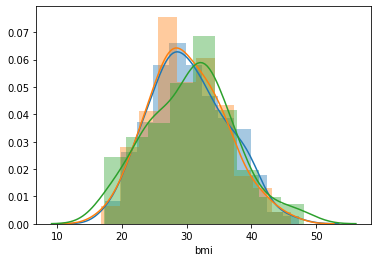

In [41]:
sns.distplot(no_child['bmi'])
sns.distplot(one_child['bmi'])
sns.distplot(two_child['bmi'])

In [42]:
# Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
# Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis

female_df = df[df['sex']=='female']
female_df
zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)

print(f_stat)
print(p_value)

## since p_value is 0.715 statistically we can say no of children has no effect on the bmi

0.3344720147757968
0.7158579926754841
